In [1]:
# Make plots interactive in the notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

import os
import sys

# Add QDYN source directory to PATH
# Go up in the directory tree
upup = [os.pardir]*2
qdyn_dir = os.path.join(*upup)
# Get QDYN src directory
src_dir = os.path.abspath(
    os.path.join(
        os.path.join(os.path.abspath(""), qdyn_dir), "src")
)
# Append src directory to Python path
sys.path.append(src_dir)
# Get QDYN plotting library directory
plot_dir = os.path.abspath(
    os.path.join(
        os.path.join(os.path.abspath(""), qdyn_dir), "utils", "post_processing")
)
# Append plotting library directory to Python path
sys.path.append(plot_dir)

# Import QDYN wrapper and plotting library
from pyqdyn import qdyn
import plot_functions as qdyn_plot

In [135]:
# Instantiate the QDYN class object
p = qdyn()

# Predefine parameters
t_yr = 3600 * 24 * 365.0    # seconds per year
Lasp = 7                    # Length of asperity / nucleation length
L = 5                       # Length of fault / nucleation length
ab_ratio = 0.8              # a/b of asperity
cab_ratio = 1 - ab_ratio
resolution = 7              # Mesh resolution / process zone width

# Get the settings dict
set_dict = p.set_dict

""" Step 1: Define simulation/mesh parameters """
# Global simulation parameters
set_dict["MESHDIM"] = 1        # Simulation dimensionality (1D fault in 2D medium)
set_dict["FINITE"] = 0         # Periodic fault
set_dict["TMAX"] = 10*t_yr     # Maximum simulation time [s]
set_dict["NTOUT"] = 100        # Save output every N steps
set_dict["NXOUT"] = 2          # Snapshot resolution (every N elements)
set_dict["V_PL"] = 1e-9        # Plate velocity
set_dict["MU"] = 3e10          # Shear modulus
set_dict["W"] = 50e3           # Loading distance [m]
set_dict["SIGMA"] = 1e8        # Effective normal stress [Pa]
set_dict["ACC"] = 1e-7         # Solver accuracy
set_dict["SOLVER"] = 2         # Solver type (Runge-Kutta)

# Setting some (default) RSF parameter values
set_dict["SET_DICT_RSF"]["A"] = 1.0e-2    # Direct effect (will be overwritten later)
set_dict["SET_DICT_RSF"]["B"] = 0.9e-2      # Evolution effect
set_dict["SET_DICT_RSF"]["DC"] = 4e-4     # Characteristic slip distance
set_dict["SET_DICT_RSF"]["V_SS"] = set_dict["V_PL"]    # Reference velocity [m/s]
set_dict["SET_DICT_RSF"]["V_0"] = 0.5 * set_dict["V_PL"]    # Reference velocity [m/s]
set_dict["SET_DICT_RSF"]["TH_0"] = set_dict["SET_DICT_RSF"]["DC"] / set_dict["V_PL"]    # Initial state [s]

# Setting fluid injection parameters
set_dict["FEAT_INJECTION"] = 1
set_dict["SET_DICT_INJECTION"]["SOURCE"] = 1
set_dict["SET_DICT_INJECTION"]["C"] = 1.0
set_dict["SET_DICT_INJECTION"]["K"] = 1e-6


L = 1e3
N = 1024
# Spatial coordinate for mesh
x = np.linspace(-L/2, L/2, N, dtype=float)

dx = np.abs(x[1] - x[0])
dt = (5 * dx)**2 / (4 * set_dict["SET_DICT_INJECTION"]["K"])

set_dict["SET_DICT_INJECTION"]["T0"] = -dt



# Set mesh size and fault length
set_dict["N"] = N
set_dict["L"] = L
# Set time series output node to the middle of the fault
set_dict["IC"] = N // 2

""" Step 2: Set (default) parameter values and generate mesh """
p.settings(set_dict)
p.render_mesh()

# Write input to qdyn.in
p.write_input()

True

In [136]:
p.run()

0

In [128]:
p.read_output()

True

In [80]:
print(p.ox)

                t           x    y    z             v      theta         tau  \
0             0.0 -499.511719  0.0  0.0  5.000000e-10   400000.0  59306850.0   
1             0.0 -497.558594  0.0  0.0  5.000000e-10   400000.0  59306850.0   
2             0.0 -495.605469  0.0  0.0  5.000000e-10   400000.0  59306850.0   
3             0.0 -493.652344  0.0  0.0  5.000000e-10   400000.0  59306850.0   
4             0.0 -491.699219  0.0  0.0  5.000000e-10   400000.0  59306850.0   
...           ...         ...  ...  ...           ...        ...         ...   
1531  315360000.0  490.722656  0.0  0.0  1.289799e-10  3717826.0  59958390.0   
1532  315360000.0  492.675781  0.0  0.0  1.289611e-10  3718403.0  59958380.0   
1533  315360000.0  494.628906  0.0  0.0  1.289467e-10  3718844.0  59958380.0   
1534  315360000.0  496.582031  0.0  0.0  1.289367e-10  3719149.0  59958370.0   
1535  315360000.0  498.535156  0.0  0.0  1.289312e-10  3719319.0  59958370.0   

      tau_dot      slip        sigma   

<IPython.core.display.Javascript object>


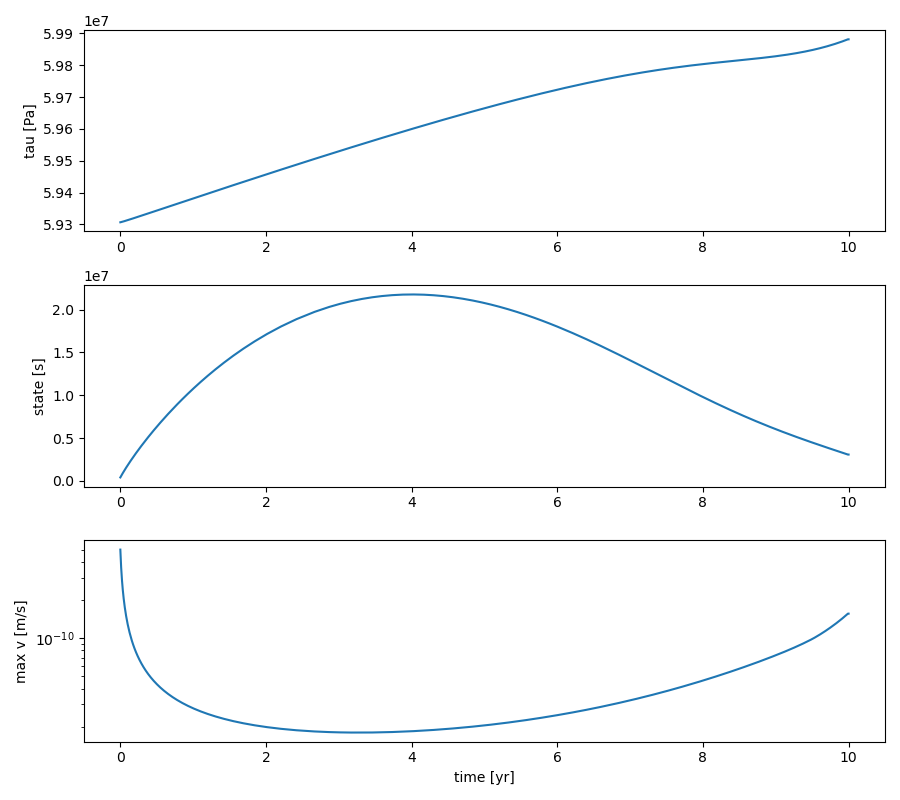

In [81]:
# Time series of stress, state, and maximum slip rate on the fault
qdyn_plot.timeseries(p.ot[0], p.ot_vmax)

[2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35 2.083618e-35
 2.083618e

<IPython.core.display.Javascript object>


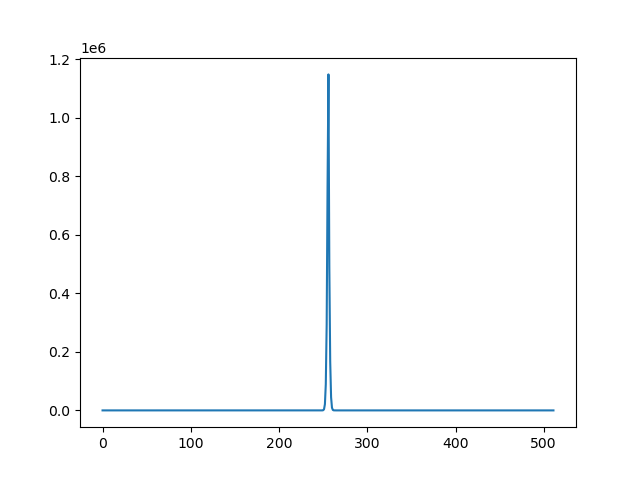

In [129]:
t_ox = p.ox["t"].unique()
x_ox = p.ox["x"].unique()
P = np.array(p.ox["P"]).reshape((len(t_ox), len(x_ox)))
print(P[1])

plt.close("all")
plt.figure()
plt.plot(P[0])
plt.show()

<IPython.core.display.Javascript object>


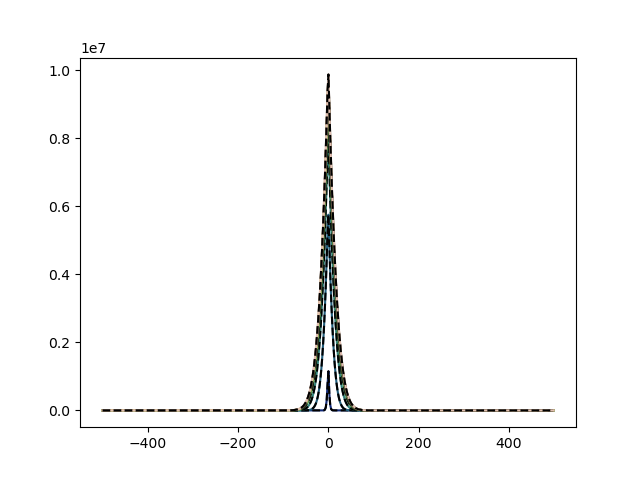

In [132]:
def const_vol(x, t):
    alpha = np.sqrt(4 * set_dict["SET_DICT_INJECTION"]["K"] * (t - set_dict["SET_DICT_INJECTION"]["T0"]))
    x_alpha = ((x - set_dict["SET_DICT_INJECTION"]["X0"]) / alpha)**2
    x_alpha = np.minimum(x_alpha, 90.0)
    P = set_dict["SET_DICT_INJECTION"]["C"] * np.exp(-x_alpha) / alpha / np.sqrt(np.pi)
    return P

def const_rate(x, t):
    from scipy.special import erfc
    alpha = np.sqrt(4 * set_dict["SET_DICT_INJECTION"]["K"] * (t - set_dict["SET_DICT_INJECTION"]["T0"]))
    x_alpha = np.abs(x - set_dict["SET_DICT_INJECTION"]["X0"]) / alpha
    exp_term = np.exp(-x_alpha**2) - np.sqrt(np.pi) * x_alpha * erfc(x_alpha)
    A = alpha / set_dict["SET_DICT_INJECTION"]["K"] * exp_term
    P = set_dict["SET_DICT_INJECTION"]["C"] * 0.5 * 1/np.sqrt(np.pi) * A
    return P

import seaborn

skip = 1
N_P = len(t_ox) // skip
colours = seaborn.color_palette("gist_earth", N_P)

plt.close("all")
plt.figure()
for i, c in enumerate(colours):
    plt.plot(x_ox, P[i * skip], c=c)
#     plt.plot(x_ox, const_vol(x_ox, t_ox[i * skip]), "k--")
    plt.plot(x_ox, const_rate(x_ox, t_ox[i * skip]), "k--")
# plt.yscale("log")
plt.show()